In [2]:
# coding: utf-8

# In[2]:


import xlrd
import xlwt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import time

data = pd.read_excel('data.xlsx')

del data['FROM DATE']
del data['TO DATE']

names = data.columns



data.drop_duplicates(inplace=True)  # removing duplicates

data.dropna()


limit = {}


def IQR_outlier(dt, name):
    q1 = dt.quantile(.25)
    q3 = dt.quantile(.75)
    iqr = q3 - q1
    l_limit = q1 - 1.5 * iqr
    r_limit = q3 + 1.5 * iqr
    l_limit = round(l_limit, 2)
    r_limit = round(r_limit, 2)
    limit[name] = [l_limit, r_limit]


def removal_outlier(st, name):
    st = st[st < limit[name][1]]
    st = st[st > limit[name][0]]
    return st


for i in range(len(names)):
    IQR_outlier(data[names[i]], names[i])

for i in range(len(names)):
    data[names[i]] = removal_outlier(data[names[i]], names[i])




from scipy.stats import zscore

# data.apply(zscore)  # feature scaling


data = (data - data.min()) / (data.max() - data.min())


from sklearn.model_selection import train_test_split
train1, test1 = train_test_split(data, test_size=0.25)  # splitting data





PM10 and WS
0.6548677722890373


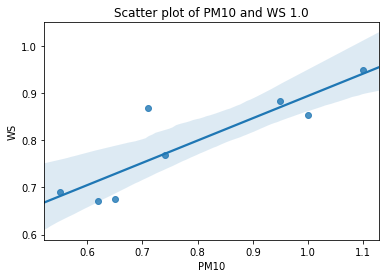

PM10 and CO
0.7443192455826799


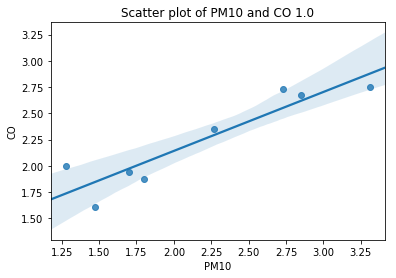

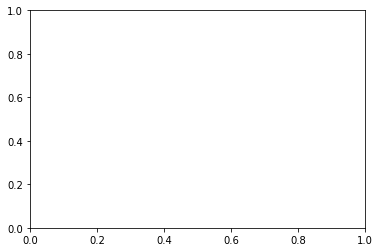

In [3]:
train = pd.read_excel('dt1_train.xlsx')
test = pd.read_excel('dt1_test.xlsx')
# print(train)
names = train.columns

for i in range(len(names)):
    # os.mkdir('scatter_plot/'+names[i])
    for j in range(len(names)):
        if (names[i] != names[j]):
#             train[names[i]] = train[names[i]].apply(np.sqrt)
#             train[names[j]] = train[names[j]].apply(np.sqrt)
#             test[names[i]] = test[names[i]].apply(np.sqrt)
#             test[names[j]] = test[names[j]].apply(np.sqrt)

            x_train = train[names[i]]
            y_train = train[names[j]]
            x_test = test[names[i]]
            y_test = test[names[j]]

            x_train = np.array(x_train)
            y_train = np.array(y_train)
            x_test = np.array(x_test)
            y_test = np.array(y_test)

            x_train = x_train.reshape(-1, 1)
            x_test = x_test.reshape(-1, 1)

            clf = LinearRegression(normalize=True)
            clf.fit(x_train, y_train)
            y_pred = clf.predict(x_test)

            n11 = r2_score(y_test, y_pred)
            if (n11 > 0.3) and ((names[i] == 'PM10' and names[j] =='WS') or (names[i] == 'PM10' and names[j] =='CO') or (names[i] == 'PM2.5' and names[j] =='WS')):
                print(names[i], 'and', names[j])
                print(n11)
                st1 = names[i] + ' and ' + names[j] + '\n'

                sns.regplot(y_test, y_pred)
                plt.xlabel(names[i])
                plt.ylabel(names[j])
                plt.title('Scatter plot of ' + str(names[i]) + ' and ' + str(names[j]) + ' ' + str(round(n11)))

                plt.savefig('pics/' + str(names[i]) + '_' + names[j] + '.png')
                plt.show()
                plt.clf()
                plt.cla()